In [1]:
import rasterio 
from rasterio import plot 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'rasterio'

In [1]:
import rasterio 
from rasterio import plot 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'rasterio'

In [2]:
import rasterio 
from rasterio import plot 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'rasterio'

In [1]:
import rasterio 
from rasterio import plot 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
pip install matplotlib


     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.3 kB 653.6 kB/s eta 0:00:01
     -------------------------- ----------- 112.6/162.3 kB 1.3 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.3 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.3 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.3 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.3 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 162.3/162.3 kB 487.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.6 MB 12.3 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/7.6 MB 4.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.6 MB 4.2 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.6 MB 4.1 MB/s eta 

In [3]:
import matplotlib
matplotlib.__version__

'3.8.3'

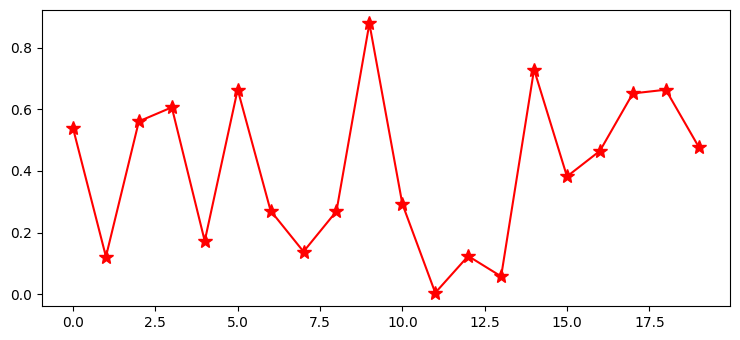

In [4]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.random.rand(20)
plt.plot(x, '*-', color='red', markersize=10)

plt.show()

In [5]:
import rasterio 
from rasterio import plot 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [6]:
import os
os.listdir('../Landsat8/')

['LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif',
 'LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif']

In [7]:
#import bands as separate 1 band raster
band4 = rasterio.open('../Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif') #red
band5 = rasterio.open('../Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif') #nir

In [8]:
#number of raster rows
band4.height

1338

In [9]:
#number of raster columns
band4.width

2107

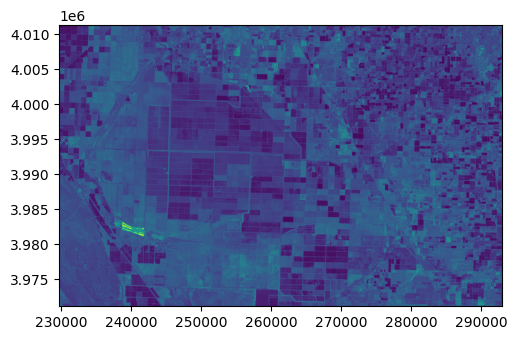

<Axes: >

In [10]:
#plot band 
plot.show(band4)

In [11]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [12]:
#raster sytem of reference
band4.crs

CRS.from_epsg(32611)

In [13]:
#raster transform parameters
band4.transform

Affine(30.0, 0.0, 229755.0,
       0.0, -30.0, 4011285.0)

In [14]:
#raster values as matrix array
band4.read(1)

array([[ 7479,  7474,  7472, ...,  8970,  9186,  9849],
       [ 7482,  7488,  7477, ...,  9048,  9151,  9667],
       [ 7497,  7468,  7454, ...,  9115,  9150, 10156],
       ...,
       [17295, 16415, 16222, ..., 11569, 11376, 11254],
       [17162, 16303, 15322, ..., 11617, 11278, 11115],
       [16905, 16026, 15720, ..., 12508, 12893, 13168]], dtype=uint16)

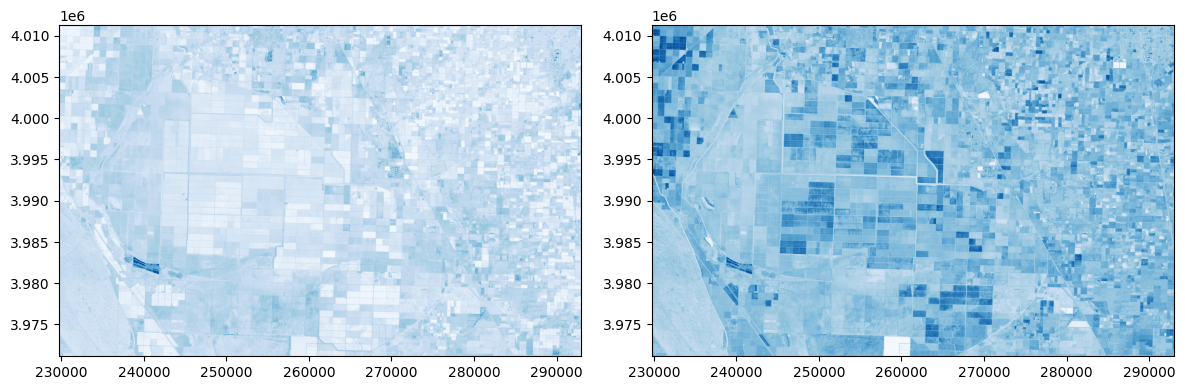

In [15]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [16]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir

array([[24079., 24061., 24131., ...,  9747., 10231., 11190.],
       [24169., 24213., 24173., ...,  9900., 10084., 10855.],
       [24253., 24438., 24265., ...,  9910., 10079., 11592.],
       ...,
       [21594., 20611., 20397., ..., 20179., 20035., 19973.],
       [21441., 20507., 19362., ..., 20189., 19976., 19941.],
       [21080., 20536., 20172., ..., 20531., 20744., 20915.]])

In [17]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]

array([[0.52601559, 0.525987  , 0.5271335 , 0.52442396, 0.52136479],
       [0.52721873, 0.52758588, 0.52751975, 0.5246888 , 0.52311125],
       [0.52774803, 0.53187488, 0.52999779, 0.52700989, 0.52593861],
       [0.53090761, 0.52997044, 0.52947468, 0.52603985, 0.52432536],
       [0.5317881 , 0.52931154, 0.53190956, 0.52842704, 0.52400689]])

In [18]:
#export ndvi image
ndviImage = rasterio.open('../Output/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

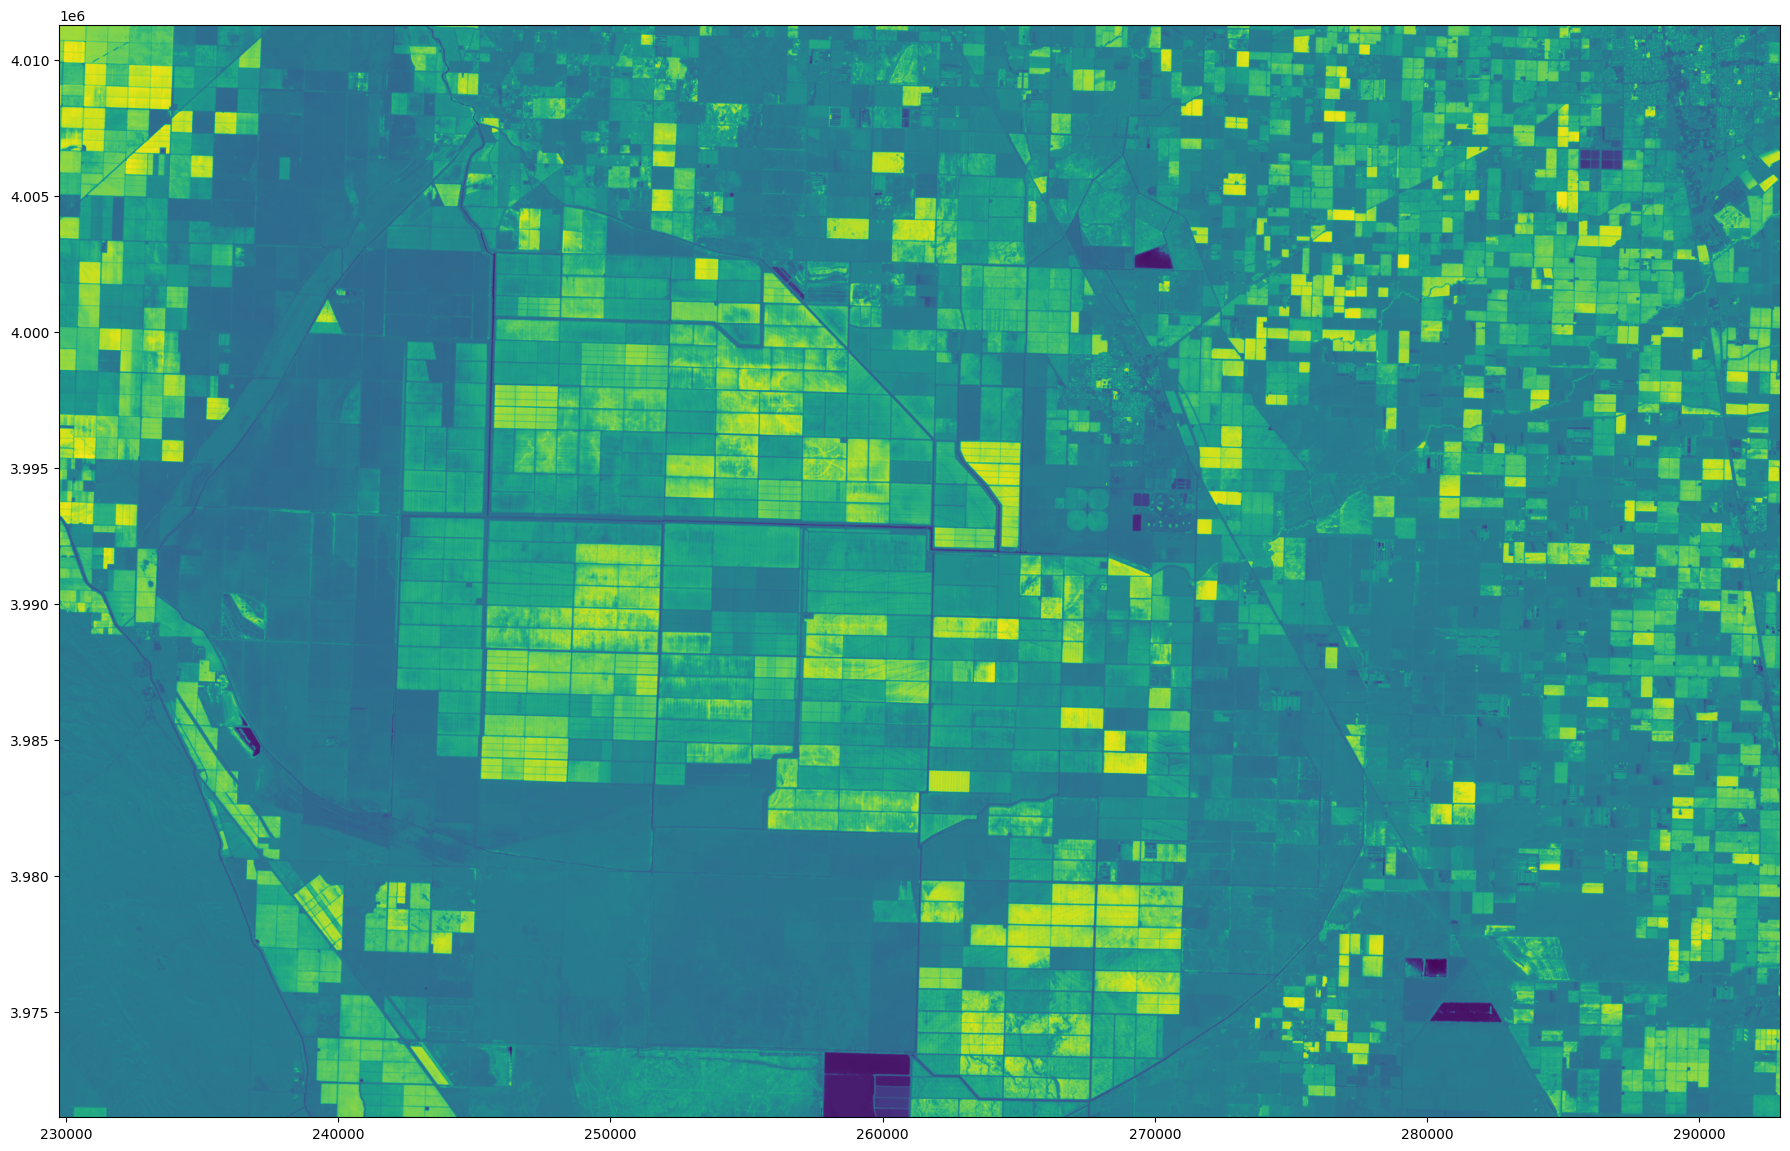

<Axes: >

In [19]:
#plot ndvi
ndvi = rasterio.open('../Output/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)